# REGRESIÓN LINEAL

* Para este análisis necesitamos instalar un par de librerías.
* La librería pyreadstat permite leer archivos.dta en python y construir DataFrames a partir de los datos.
* La librería statsmodels nos permitirá utilizar el modelo de regresión lineal

In [ ]:
#Corre esta celda solo una vez
#
#!pip install pyreadstat
#!pip install statsmodels

In [1]:
import pyreadstat #librería para leer  formato.dta
import pandas as pd #librería para manipulación de datos
import matplotlib #librería para graficar
from matplotlib import pyplot as plt #librería para graficar
import statsmodels.api as sm #librería para análisis estadístico
from IPython.display import Image # Para imagénes
import numpy as np # Algunas funciones matemáticas
import statsmodels.api as sm # Para funciones de regresión y otros 
from statsmodels.formula.api import ols # Para pruebas de hipotesis

#
import warnings
warnings.filterwarnings('ignore')

## Aplicación del Método de MCO: Retornos a Escala en la Industria Eléctrica

Esta aplicación tiene su origen en el trabajo de Nerlove (1963). Este es un estudio clásico de los retornos a escala en una industria regulada. Nerlove ofreció una buena descripción de la industria eléctrica, dicha descripción es válida para el momento en que se escribió:
* Los oferentes/generadores de electricidad son monopolios locales privados.
* Las tarifas o precios minoristas de la eléctricidad son establecidos por un ente regulador.
* Los precios de los factores productivos están dados y no son modificables por las empresas en el corto plazo, ya que existen diversos contratos de largo plazo (por ejemplo, los contratos laborales).

Respecto de los datos, estos consisten en 145 empresas ubicadas en 44 estados en EUA en el año 1955, ya que son para los únicos estados para los que existe información. El estudio utilizó información de aproximadamente el 80% de la electricidad producida.

Visto por la forma de producción, Nerlove identicó que existían 3 métodos de producción de electricidad: 
* Motores de conbustión interna.
* Hidroeléctricas.
* Termoeléctricas.

Al respecto, Nerlove muestra que en los 50's cerca del 70% de la electricidad era producida por las empresas termoeléctricas. El combustible pincipal empleado en dichas termoeléctricas era carbón (66.4%), seguido de petróleo (14.5%) y gasolina (19.1%).


## Variables: 
Las variables consideradas son: costos totales, precios de los factores (salarios, precios de combustibles, renta o precio del capital), y el producto. Aunque las empresas son dueñas del capital, en el modelo se supone que dichas empresas se comportan como si estas pagaran una renta de capital, por lo que se imputa un precio por el costo de capital.

No obstante, para mayores detalles refierase al documento original de Nerlove, donde se describe con mayor detalle la forma en que fue construída la base de datos. Los datos de producción, combustibles y costos laborales fueron obtenidos de la Federal Power Commision (1956).

## Motivación económica:
La motivación para el analísis es que mediante un enfoque econométrico se puede construir una curva de costo promedio (AC, por sus siglas en inglés) para cada empresa, misma que es diferente de la promedio de la industria. Esto es, la empresas enfrentan diferentes precios por los factores productivos y por lo tanto diferentes costos totales, medios y marginales.

Para enfocarnos en la conexión entre la eficiencia de producción y el producto, asumimos que todas las empresas enfrentan mas o menos los mismos precios de los factores, y la única razón por la que las curvas de costo medio (AC) y de costo marginal (MC) difieren entre las empresas es la diferencia en la eficiencia productiva. Las curvas de AC y de MC tienen pendiente positiva para reflejar retornos a escala decrecientes. 

Si vemos la siguiente Figura, las curvas de AC y MC de la empresa A estan a la izquierda de las de la empresa B porque la empresa A es menos eficiente que B. Esto es derivado de que la industria es competida, ambas empresas enfrentan el mismo precio $p$. Dado que la cantidad está determinada por la intersección de MC y el precio de mercado, las combinaciones de cantidad / producto y el AC para las dos empresas e ilustra en la Figura.

<img src="Hayashi_p62.PNG" style="width: 600px;"> 

De esta forma, la curva que resulta de conectar los puntos A y B puede tener una pendiente negativa, dando la impresión de un escenario de rendimientos crecientes a escala en la industria, ya que la agregación de todos los puntos de las empresas individuales conformaran la curva de costos promedio de la industria. 

La parametrización de la función de costos parte de una función de producción del tipo Cobb - Douglas:
$$Q_i = A_i x^{\alpha_1}_{i1} x^{\alpha_2}_{i2} x^{\alpha_3}_{i3}$$

Donde $Q_i$ es la producción de la empresa $i$, $x_{i1}$ es el insumo de trabajo para la empresa $i$, $x_{i2}$ es el insumo capital para la empresa $i$, y $x_{i3}$ es el insumo de combustible para la empresa $i$. El término $A_i$ captura las direncias no observables en la eficiencia de producción (este término también es conocido como el de heterogenidad de las empresas). 

Asimismo, la suma de los paramétros: $\alpha_1 + \alpha_2 + \alpha_3 = r$ indica el grado de retornos a escala. Dado esto último, asumiremos que el grado de retornos a escala es constante (esto no significa que existen retornos a escala constantes, ya que para ello se debería cumplir que $r = 1$). Adicionalmente, en el modelo se supone que dada la naturaleza de propiedad de las empresas generadoras, el problema que cada una ellas enfrenta es uno de minimización de costos (véase Nerlove (1963) para una discusión sobre las restricciones relacionadas con este supuesto).


En este sentido, el problema que cada empresa enfrenta es el de minimizar sus costos de producción, sujeto a la cantidad producida, es decir:
$$\min_{x_{i1}, \ldots, x_{iK}} \sum_{k = 1}^{K} p_{ik}x_{ik}$$
s.a.
$$Q_i = f(x_{i1}, \ldots, x_{iK}, A_i)$$

Resolviendo el problema anterior:
$$ln(C_i) = \mu_i +  \frac{1}{r} ln(Q_i) + \frac{\alpha_1}{r} ln(p_{i1}) + \frac{\alpha_2}{r} ln(p_{i2}) + \frac{\alpha_3}{r} ln(p_{i3})$$

Donde $\mu_i = ln \left[ r \left( A_i \alpha^{\alpha_1}_{1} \alpha^{\alpha_2}_{2} \alpha^{\alpha_3}_{3} \right)^{-1/r} \right]$. 

La ecuación es conocida como una ecuación log-lineal, de la cual se puede interpretar a sus pendientes como elasticidades. Es decir, el cambio porcentual en el costo total cuando se incremnta en 1% el precio de cualquiera de los factores. 

Si definimos a $\mu = \mathbb{E} [\mu_i]$ y a $\varepsilon_i = \mu_i - \mu$, de tal forma que $\mathbb{E} [\varepsilon_i] = 0$. De esta forma $\varepsilon_i$ se puede interpretar como la eficiencia productiva de las empresas. Considerando lo anterior plateamos la expresión:
$$ln(C_i) = \beta_1 +  \beta_2 ln(Q_i) + \beta_3 ln(p_{i1}) + \beta_4 ln(p_{i2}) + \beta_5 ln(p_{i3}) + \varepsilon_i$$

Donde:
$$\beta_1 = \mu$$

$$\beta_2 = \frac{1}{r}$$

$$\beta_3 = \frac{\alpha_1}{r}$$

$$\beta_4 = \frac{\alpha_2}{r}$$

$$\beta_5 = \frac{\alpha_3}{r}$$

De esta forma podemos decir que $y_i = ln(C_i)$ y que:
$$\mathbf{X}'_i = [ln(Q_i), ln(p_{i1}), ln(p_{i2}), ln(p_{i3})]$$

Esta función tmabién es conocida como una función trans-log o trans-logarítmica, de la cual podemos recuperar una forma estimada de la función de costos original:

<img src="Nerlove.PNG" style="width: 500px;"> 

# Plan de la clase:
* ### Regresión lineal
* ### Media condicional descrita por:
$$ln(C_i) = \beta_1 +  \beta_2 ln(Output_i) + \beta_3 ln(plabor_{i1}) + \beta_4 ln(pfuel_{i2}) + \beta_5 ln(pkap_{i3}) + \varepsilon_i$$

### Metadatos: La base de datos contiene 145 observaciones  de las siguientes variables:
**Datos de Demanda de Gasolina:**
* **totcost:** costs in 1970, MM USD

* **output:** output billion KwH
* **plabor:** price of labor
* **pfuel:** price of fuel
* **pkap:** price of capital

In [2]:
# Leer desde DATA

dtafile = 'nerlove63.dta'
dataframe, meta = pyreadstat.read_dta(dtafile)

In [3]:
#
dataframe.columns

Index(['totcost', 'output', 'plabor', 'pfuel', 'pkap'], dtype='object')

In [4]:
#
dataframe.head(5)

,totcost,output,plabor,pfuel,pkap
0,0.082,2.0,2.09,17.900000,183.0
1,0.661,3.0,2.05,35.099998,174.0
2,0.990,4.0,2.05,35.099998,171.0
3,0.315,4.0,1.83,32.200001,166.0
4,0.197,5.0,2.12,28.600000,233.0


### **Estadisticas y tablas resumen**

In [5]:
#
dataframe.describe().round(2)

,totcost,output,plabor,pfuel,pkap
count,145.00,145.00,145.00,145.00,145.00
mean,12.98,2133.08,1.97,26.18,174.50
std,19.79,2931.94,0.24,7.88,18.21
min,0.08,2.00,1.45,10.30,138.00
25%,2.38,279.00,1.76,21.30,162.00
50%,6.75,1109.00,2.04,26.90,170.00
75%,14.13,2507.00,2.19,32.20,183.00
max,139.42,16719.00,2.32,42.80,233.00


In [6]:
#
dataframe.dtypes

totcost    float64
output     float64
plabor     float64
pfuel      float64
pkap       float64
dtype: object

In [7]:
#
dataframe.isnull().values.any()

False

### **Generando nuevas variables**

In [8]:
#Creamos la variable Ltotcost aplicando logaritmo a totcost y guardamos el resultado en la nueva columna Ltotcost

dataframe['Ltotcost'] = np.log(dataframe['totcost'])
dataframe['Loutput'] = np.log(dataframe['output'])
dataframe['Lplabor'] = np.log(dataframe['plabor'])
dataframe['Lpfuel'] = np.log(dataframe['pfuel'])
dataframe['Lpkap'] = np.log(dataframe['pkap'])
dataframe['avgcost'] = dataframe["totcost"]/dataframe["output"]

In [9]:
#
dataframe['One'] = 1

In [10]:
#
dataframe.head()

,totcost,output,plabor,pfuel,pkap,Ltotcost,Loutput,Lplabor,Lpfuel,Lpkap,avgcost,One
0,0.082,2.0,2.09,17.900000,183.0,-2.501036,0.693147,0.737164,2.884801,5.209486,0.041000,1
1,0.661,3.0,2.05,35.099998,174.0,-0.414001,1.098612,0.717840,3.558201,5.159055,0.220333,1
2,0.990,4.0,2.05,35.099998,171.0,-0.010050,1.386294,0.717840,3.558201,5.141664,0.247500,1
3,0.315,4.0,1.83,32.200001,166.0,-1.155183,1.386294,0.604316,3.471966,5.111988,0.078750,1
4,0.197,5.0,2.12,28.600000,233.0,-1.624552,1.609438,0.751416,3.353407,5.451038,0.039400,1


### **Estadisticas Descriptivas**

In [11]:
# 
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


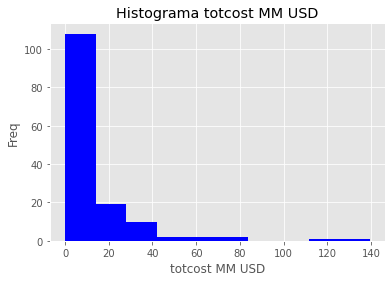

In [12]:
#
plt.style.use('ggplot')
dataframe['totcost'].hist(color = 'blue')
plt.ylabel("Freq")
plt.xlabel("totcost MM USD")
plt.title("Histograma totcost MM USD")
plt.show()

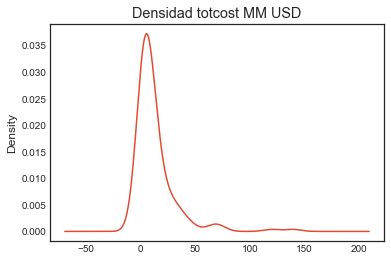

In [13]:
#
plt.style.use('seaborn-white')
dataframe['totcost'].plot.kde()
plt.title("Densidad totcost MM USD")
plt.show()

### ** Regresion:**

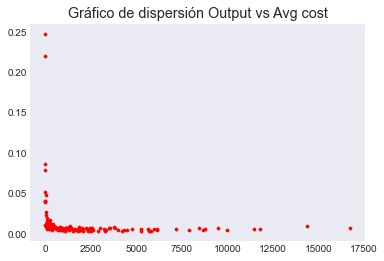

In [14]:
#
plt.style.use('seaborn-dark')
plt.scatter(dataframe.output, dataframe.avgcost, s = 10, color ="red")
plt.title("Gráfico de dispersión Output vs Avg cost")
plt.show()

In [15]:
#
Y = dataframe["Ltotcost"]
X = dataframe[["One","Loutput", "Lplabor", "Lpfuel", "Lpkap"]]
#X2 = sm.add_constant(X)
est = sm.OLS(Y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               Ltotcost   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     437.7
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           4.82e-78
Time:                        11:03:03   Log-Likelihood:                -67.542
No. Observations:                 145   AIC:                             145.1
Df Residuals:                     140   BIC:                             160.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
One           -3.5265      1.774     -1.987      0.0

In [16]:
#
Y = dataframe["Ltotcost"]
X = dataframe[["Loutput", "Lplabor", "Lpfuel", "Lpkap"]]
X2 = sm.add_constant(X)
est = sm.OLS(Y,X2).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               Ltotcost   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     437.7
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           4.82e-78
Time:                        11:03:04   Log-Likelihood:                -67.542
No. Observations:                 145   AIC:                             145.1
Df Residuals:                     140   BIC:                             160.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5265      1.774     -1.987      0.0

In [17]:
# # Estimación (FINAL):
Y = dataframe["Ltotcost"]
X = dataframe[["One","Loutput", "Lplabor", "Lpfuel", "Lpkap"]]
est = sm.OLS(Y,X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               Ltotcost   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     437.7
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           4.82e-78
Time:                        11:03:05   Log-Likelihood:                -67.542
No. Observations:                 145   AIC:                             145.1
Df Residuals:                     140   BIC:                             160.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
One           -3.5265      1.774     -1.987      0.0

Estimadores:
$$\hat{\boldsymbol \beta} = (\mathbf{X'X})^{-1}\mathbf{X'Y}$$

In [18]:
#
est.params

One       -3.526503
Loutput    0.720394
Lplabor    0.436341
Lpfuel     0.426517
Lpkap     -0.219888
dtype: float64

La especificación más común de la prueba de hipótesis en el análisis de regresión es:
$$H_0: \beta_k = 0$$
$$H_a: \beta_k \neq 0$$

Lo que en términos de una prueba $t$ es la siguiente:
$$t = \frac{\hat{\beta}_k - 0}{\sqrt{\hat{\sigma}^2 (\mathbf{X}'\mathbf{X})^{-1}_{kk}}} \sim t_{n - k}$$

In [19]:
#
est.tvalues

One        -1.987471
Loutput    41.244483
Lplabor     1.499209
Lpfuel      4.249483
Lpkap      -0.647819
dtype: float64

La hipotésis nula de una prueba global se puede escribir como:
$$H_0: \beta_1 = \beta_2 = \ldots = \beta_K = 0$$
$$H_a: No H_0$$

Esta prueba se le conoce como prueba global, ya que prueba si en conjunto todas las variables independientes tienen un efecto nulo en $\mathbf{Y}$. Notemos que la prueba implica que la estadística $F$ de prueba será:
$$F = \frac{(\mathbf{R} \boldsymbol{\hat{\beta}} - \mathbf{r})'[\mathbf{R} \hat{\sigma}^2 (\mathbf{X}'\mathbf{X})^{-1}\mathbf{R}']^{-1}(\mathbf{R} \boldsymbol{\hat{\beta}} - \mathbf{r})}{J} \sim F_{J, n - K}$$    

La matriz $\mathbf{R}$ y vector $\mathbf{r}$:
$$\mathbf{R} = \left[ 
            \begin{array}{c c c c}
                0 & 0 & \ldots & 0 \\ 0 & 1 & \ldots & 0 \\ 0 & 0 & \ldots & 0 \\ \vdots & \vdots & \cdots & \vdots \\ 0 & 0 & \ldots & 1 \\
            \end{array}
            \right]$$

$$\mathbf{r} = \left[ 
            \begin{array}{c}
                0 \\ 0 \\ 0 \\ \vdots \\ 0 \\
            \end{array} 
            \right]$$


In [20]:
#
est.fvalue

437.68628137228876

Alternativamente:

In [21]:
#
R = np.array(([0,0,0,0,0], [0,1,0,0,0], [0,0,1,0,0], [0,0,0,1,0], [0,0,0,0,1]))
R

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [22]:
#
print(est.f_test(R))

<F test: F=437.6862813722891, p=4.81937128436905e-78, df_denom=140, df_num=4>


En el caso que nos ocupa queremos probar si la suma de los coeficientes asociados los factores productivos es 1, es decir, la función de costos exibe rendimientos constantes a escala:
$$H_0: \beta_3 + \beta_4 + \beta_5 = 1$$
$$H_1: \beta_3 + \beta_4 + \beta_5 \neq 1$$

Existen dos alternativas para probar la hipótesis. Partamos de que:
La matriz $\mathbf{R}$ y vector $\mathbf{r}$:
$$\mathbf{R} = \left[ 
            \begin{array}{c c c c c}
                0 & 0 & 1 & 1 & 1 
            \end{array}
            \right]$$

$$\mathbf{r} = 1$$


In [23]:
#
formula = 'Ltotcost ~  One + Loutput + Lplabor + Lpfuel + Lpkap'
results = ols(formula, dataframe).fit()
# Se pueden incluir tantas restricciones queramos, agregando una coma (,) segido de la restricción
hypotheses = 'Lplabor + Lpfuel + Lpkap = 1'

$$H_0 = \beta_3 + \beta_4 + \beta_5 = 1$$
$$H_0 = \beta_3 + \beta_4 + \beta_5 - 1 = 0$$

Lo que en términos de una prueba $t$ es la siguiente:
$$t = \frac{\mathbf{R} \hat{\beta} - 1}{\sqrt{\hat{\sigma}^2 R (\mathbf{X}'\mathbf{X})^{-1} R'}} \sim t_{n - k}$$

In [24]:
# 1:
t_test = results.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.6430      0.471     -0.757      0.450      -0.289       1.575


$$F = \frac{(\mathbf{R} \boldsymbol{\hat{\beta}} - \mathbf{1})'[\mathbf{R} \hat{\sigma}^2 (\mathbf{X}'\mathbf{X})^{-1}\mathbf{R}']^{-1}(\mathbf{R} \boldsymbol{\hat{\beta}} - \mathbf{1})}{1} \sim F_{1, n - K}$$    


In [25]:
# 2:
f_test = results.f_test(hypotheses)
print(f_test)

<F test: F=0.5736605269664622, p=0.4500808771656519, df_denom=140, df_num=1>


$$H_0 = \beta_3 + \beta_4 + \beta_5 = 1, \beta_2 = 0$$
$$H_1 = No H_0$$

In [26]:
# Otro ejemplo: 
hypotheses_2 = 'Lplabor + Lpfuel + Lpkap = 1, Loutput = 0'
f_test = results.f_test(hypotheses_2)
print(f_test)

<F test: F=851.9526332779537, p=4.2389682626677003e-79, df_denom=140, df_num=2>


In [27]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               Ltotcost   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     437.7
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           4.82e-78
Time:                        11:03:37   Log-Likelihood:                -67.542
No. Observations:                 145   AIC:                             145.1
Df Residuals:                     140   BIC:                             160.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
One           -3.5265      1.774     -1.987      0.0

## Cómo se ve la curva de costos medios estimados:

In [28]:
# Rcuperamos de la regresión el valor del Log del costo estimado
LY_pred = est.predict(X)
# Anti-log:
Y = np.exp(LY_pred)
# Colocamos en el Data Frame:
dataframe['totcost_e'] = Y
dataframe['avgcost_e'] = dataframe["totcost_e"]/dataframe["output"]
dataframe.head()

,totcost,output,plabor,pfuel,pkap,Ltotcost,Loutput,Lplabor,Lpfuel,Lpkap,avgcost,One,totcost_e,avgcost_e
0,0.082,2.0,2.09,17.900000,183.0,-2.501036,0.693147,0.737164,2.884801,5.209486,0.041000,1,0.072759,0.036380
1,0.661,3.0,2.05,35.099998,174.0,-0.414001,1.098612,0.717840,3.558201,5.159055,0.220333,1,0.130207,0.043402
2,0.990,4.0,2.05,35.099998,171.0,-0.010050,1.386294,0.717840,3.558201,5.141664,0.247500,1,0.160805,0.040201
3,0.315,4.0,1.83,32.200001,166.0,-1.155183,1.386294,0.604316,3.471966,5.111988,0.078750,1,0.148473,0.037118
4,0.197,5.0,2.12,28.600000,233.0,-1.624552,1.609438,0.751416,3.353407,5.451038,0.039400,1,0.164058,0.032812


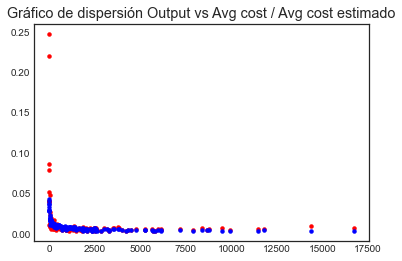

In [29]:
# graficamos resultados:
plt.style.use('seaborn-white')
plt.scatter(dataframe.output, dataframe.avgcost, s = 15, color ="red")
plt.scatter(dataframe.output, dataframe.avgcost_e, s = 15, color ="blue")
plt.title("Gráfico de dispersión Output vs Avg cost / Avg cost estimado")
#
plt.show()

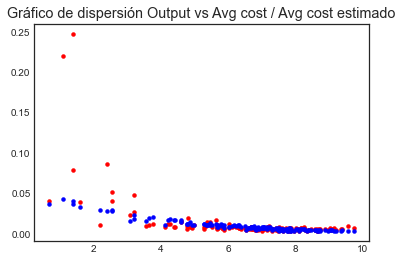

In [30]:
# graficamos resultados:
plt.scatter(dataframe.Loutput, dataframe.avgcost, s = 15, color ="red")
plt.scatter(dataframe.Loutput, dataframe.avgcost_e, s = 15, color ="blue")
plt.title("Gráfico de dispersión Output vs Avg cost / Avg cost estimado")
#
plt.show()

# Ejercicio:

Estimar:
$$ln(C_i) = \beta_1 +  \beta_2 ln(Q_i) + \beta_2 (ln(Q_i))^2 + \beta_3 ln(p_{i1}) + \beta_4 ln(p_{i2}) + \beta_5 ln(p_{i3}) + \varepsilon_i$$

Probar si:
$$H_0: \beta_3 + \beta_4 + \beta_5 = 1$$
$$H_1: \beta_3 + \beta_4 + \beta_5 \neq 1$$


In [ ]:
# Read DataFrame:
dataframe.head()

In [ ]:
#
dataframe["Loutput_2"] = dataframe["Loutput"]**2

In [ ]:
#
dataframe.head()

In [ ]:
# Definición de variables:
Y = dataframe["Ltotcost"]
X = dataframe[["One", ]]
#
X

In [ ]:
# Estimación:
est = sm.OLS(Y,X)
est2 = est.fit()
print(est2.summary())

In [ ]:
#
formula = 'Ltotcost ~  One + '
results = ols(formula, dataframe).fit()

# Se pueden incluir tantas restricciones queramos, agregando una coma (,) segido de la restricción
hypotheses = ' +  +  = 1'
t_test = results.t_test(hypotheses)
print(t_test)